In [42]:
import pandas as pd
data=pd.read_csv('..\\dataPreprocessing\\k_movie_2.csv')
data

,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT,YEAR,MONTH,DISTB_CMPNY_COUNT,SUCCESS
0,산상수훈,유영의,(주)그란,"['이언픽쳐스', '(주)그란']",20171207,개봉영화,장편,한국,71.0,284.0,284.0,드라마,전체관람가,독립/예술영화,3.00,6.30,2017,12,2,0.0
1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",['커넥트픽쳐스(주)'],20190516,개봉영화,장편,한국,200.0,154.0,154.0,다큐멘터리,전체관람가,독립/예술영화,5.59,9.31,2019,5,1,0.0
2,기생충,봉준호,(주)바른손이앤에이,['(주)씨제이이엔엠'],20190530,개봉영화,장편,한국,1948.0,227811.0,97354.0,드라마,15세이상관람가,일반영화,9.06,8.49,2019,5,1,1.0
3,이타미 준의 바다,정다운,기린그림,['(주)영화사 진진'],20190815,개봉영화,장편,한국,57.0,144.0,144.0,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96,2019,8,1,0.0
4,벌새,김보라,에피파니(주),"['(주)엣나인필름', '(주)콘텐츠판다']",20190829,개봉영화,장편,한국,145.0,2721.0,2082.0,드라마,15세이상관람가,독립/예술영화,5.59,7.44,2019,8,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2차 송환,김동원,푸른영상,['(주)시네마달'],2022-09-,개봉영화,장편,한국,16.0,415.0,373.0,다큐멘터리,12세이상관람가,독립/예술영화,8.20,6.44,2022,9,1,0.0
354,EBS친구들 씽씽 댄스파티,감독명 누락,한국교육방송공사 EBS,['(주)에픽캔'],2022-09-,개봉영화,장편,한국,1.0,60.0,22.0,가족,전체관람가,일반영화,5.59,7.44,2022,9,1,0.0
355,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,['주식회사 씨엠닉스'],2022-09-,개봉영화,장편,한국,9.0,395.0,250.0,미스터리,15세이상관람가,독립/예술영화,5.59,7.47,2022,9,1,0.0
356,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,['(주)트리플픽쳐스'],2022-09-,개봉영화,장편,한국,6.0,662.0,336.0,액션,12세이상관람가,독립/예술영화,5.59,8.84,2022,9,1,0.0


In [43]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


(array([  1.,   0.,   0.,   0.,  29.,   0., 146.,   0., 129.,  53.]),
 array([2017. , 2017.5, 2018. , 2018.5, 2019. , 2019.5, 2020. , 2020.5,
        2021. , 2021.5, 2022. ]),
 <BarContainer object of 10 artists>)

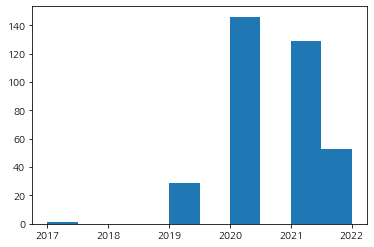

In [44]:
#연도에 따른 영화 수
import matplotlib.pyplot as plt
plt.hist(data['YEAR'])

(array([59., 33., 26., 40., 33., 18., 26., 31., 27., 65.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

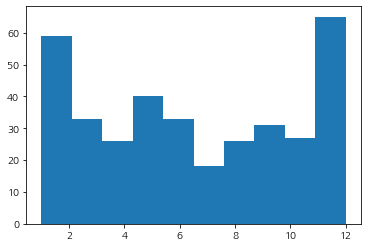

In [45]:
#월 별 영화수
plt.hist(data['MONTH'])

In [46]:
def cut(data):
    IQR=data.quantile(0.75)-data.quantile(0.25)
    return pd.DataFrame([[data.quantile(0.25)-(1.5*IQR), data.quantile(0.75)+(1.5*IQR)]]
    *data.shape[0],
    columns=['lower', 'upper'],
    index=data.index)

<AxesSubplot:xlabel='MONTH', ylabel='VIEWNG_NMPR_CO'>

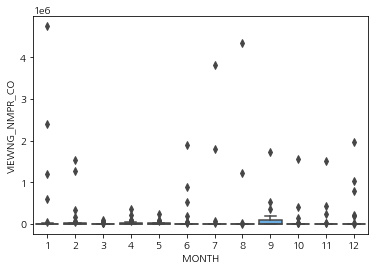

In [47]:
#월별에 따른 관객수 boxplot
import seaborn as sns
sns.boxplot(data=data, x='MONTH', y='VIEWNG_NMPR_CO')

<AxesSubplot:xlabel='MONTH', ylabel='VIEWNG_NMPR_CO'>

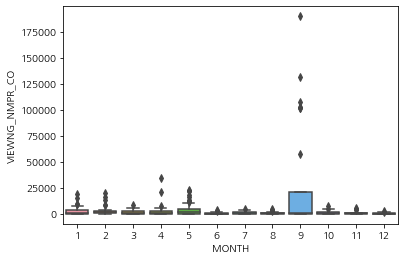

In [48]:
#월별에 따른 관객수 boxplot - 이상치 제거 
import seaborn as sns
monthdata=data
monthdata[['lower','upper']]=monthdata.groupby('MONTH')['VIEWNG_NMPR_CO'].apply(cut)

monthdata = monthdata[(monthdata['lower'] <= monthdata['VIEWNG_NMPR_CO']) & (monthdata['VIEWNG_NMPR_CO'] <= monthdata['upper'])]
monthdata

sns.boxplot(data=monthdata, x='MONTH', y='VIEWNG_NMPR_CO')


<AxesSubplot:xlabel='GENRE_NM', ylabel='VIEWNG_NMPR_CO'>

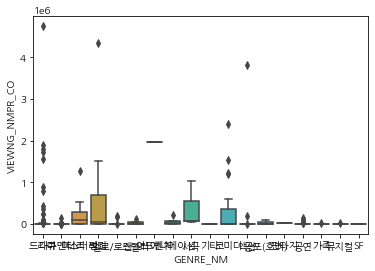

In [49]:
#장르에 따른 관객수 boxplot
import seaborn as sns
sns.boxplot(data=data, x='GENRE_NM', y='VIEWNG_NMPR_CO')

<AxesSubplot:xlabel='GENRE_NM', ylabel='VIEWNG_NMPR_CO'>

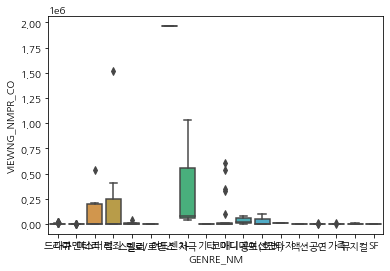

In [52]:
#장르에 따른 관객수 boxplot - 이상치 제거 
import seaborn as sns
genredata=data
genredata[['lower','upper']]=genredata.groupby('GENRE_NM')['VIEWNG_NMPR_CO'].apply(cut)

genredata = genredata[(genredata['lower'] <= genredata['VIEWNG_NMPR_CO']) & (genredata['VIEWNG_NMPR_CO'] <= genredata['upper'])]
genredata

sns.boxplot(data=genredata, x='GENRE_NM', y='VIEWNG_NMPR_CO')

<AxesSubplot:xlabel='MOVIE_SDIV_NM', ylabel='VIEWNG_NMPR_CO'>

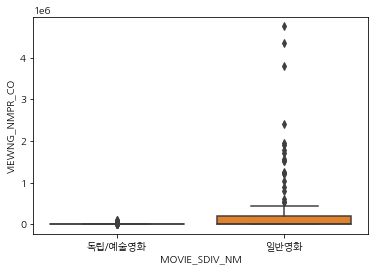

In [50]:
#영화구분에 따른 관객수 boxplot
import seaborn as sns
sns.boxplot(data=data, x='MOVIE_SDIV_NM', y='VIEWNG_NMPR_CO')

<AxesSubplot:xlabel='MOVIE_SDIV_NM', ylabel='VIEWNG_NMPR_CO'>

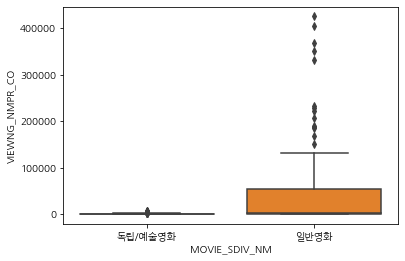

In [54]:
#영화구분에 따른 관객수 boxplot - 이상치 제거 
import seaborn as sns
sdivdata=data
sdivdata[['lower','upper']]=sdivdata.groupby('MOVIE_SDIV_NM')['VIEWNG_NMPR_CO'].apply(cut)

sdivdata = sdivdata[(sdivdata['lower'] <= sdivdata['VIEWNG_NMPR_CO']) & (sdivdata['VIEWNG_NMPR_CO'] <= sdivdata['upper'])]
sdivdata

sns.boxplot(data=sdivdata, x='MOVIE_SDIV_NM', y='VIEWNG_NMPR_CO')

<AxesSubplot:xlabel='GRAD_NM', ylabel='VIEWNG_NMPR_CO'>

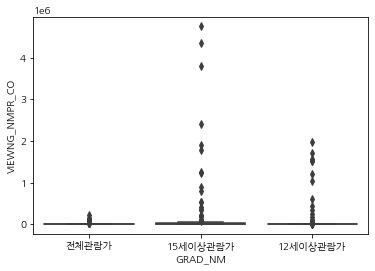

In [51]:
#연령제한에 따른 관객수 boxplot
import seaborn as sns
sns.boxplot(data=data, x='GRAD_NM', y='VIEWNG_NMPR_CO')


<AxesSubplot:xlabel='GRAD_NM', ylabel='VIEWNG_NMPR_CO'>

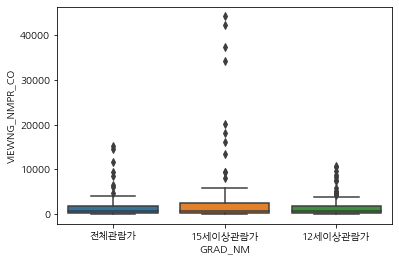

In [55]:
#연령제한에 따른 관객수 boxplot - 이상치 제거 
import seaborn as sns
graddata=data
graddata[['lower','upper']]=graddata.groupby('GRAD_NM')['VIEWNG_NMPR_CO'].apply(cut)

graddata = graddata[(graddata['lower'] <= graddata['VIEWNG_NMPR_CO']) & (graddata['VIEWNG_NMPR_CO'] <= graddata['upper'])]
graddata

sns.boxplot(data=graddata, x='GRAD_NM', y='VIEWNG_NMPR_CO')